In [23]:
import pandas as pd
import json
import math
import os
import matplotlib.pyplot as plt
import numpy as np
import mplfinance as mpf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
DATASET_PATH = "./dataset/"

In [24]:
ticker = "فملی"
df = pd.read_csv(DATASET_PATH+ticker+'.csv')
# Change names
df.columns = df.columns.str.capitalize()
df.set_index('Date', inplace=True)   # Set Jdate as Index
df.index = pd.to_datetime(df.index)

In [25]:
df.head()

,Open,High,Low,Adjclose,Value,Volume,Count,Yesterday,Close,Jdate,Rsi,Ema20,Ema100,Ema150
Date,,,,,,,,,,,,,,
2007-10-29,8252.0,8469.0,8252.0,8266.0,50789716124,6143965,780,8420.0,8266.0,1386-08-07,47.760399,8654.161149,7109.466829,6025.500000
2007-10-30,8240.0,8431.0,8140.0,8356.0,22491955322,2691694,663,8266.0,8356.0,1386-08-08,50.014531,8625.764849,7134.150655,6056.367550
2007-10-31,8496.0,8499.0,8189.0,8281.0,18966117882,2287460,608,8356.0,8281.0,1386-08-09,48.190485,8592.930102,7156.860543,6085.832880
2007-11-03,8116.0,8208.0,8116.0,8208.0,8329151428,1026263,37,8281.0,8208.0,1386-08-12,46.454656,8556.270092,7177.675185,6113.941054
2007-11-04,8044.0,8066.0,8044.0,8066.0,16119709668,2003942,68,8208.0,8066.0,1386-08-13,43.263767,8509.577702,7195.265776,6139.796139


In [26]:
df.describe()

,Open,High,Low,Adjclose,Value,Volume,Count,Yesterday,Close,Rsi,Ema20,Ema100,Ema150
count,3528.000000,3528.000000,3528.000000,3528.000000,3.528000e+03,3.528000e+03,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000
mean,6246.560091,6342.334467,6138.973356,6249.710034,3.759902e+11,3.530731e+07,4435.691893,6236.850057,6242.316893,49.974660,6246.227542,6240.219284,6215.730729
std,5292.567393,5414.704078,5153.110027,5280.615872,1.160664e+12,6.505554e+07,12422.485057,5266.297905,5279.193024,15.190764,5180.239827,4677.909953,4417.228361
min,1131.000000,1155.000000,1101.000000,1139.000000,3.656000e+04,1.000000e+01,1.000000,1139.000000,1140.000000,2.308822,1177.788266,1325.781576,1442.467952
25%,2766.250000,2799.000000,2714.250000,2766.500000,6.747333e+09,1.755942e+06,230.000000,2762.000000,2761.250000,40.011382,2805.067161,3054.354432,3105.085777
50%,4951.000000,4998.500000,4890.000000,4918.000000,2.667673e+10,8.015099e+06,641.500000,4911.500000,4944.500000,49.637983,4937.625726,5201.586187,5407.743823
75%,7460.000000,7537.500000,7385.500000,7479.250000,2.403280e+11,4.377639e+07,3180.250000,7476.250000,7473.750000,60.467621,7471.955138,7479.135349,7357.353777
max,37920.000000,39810.000000,36500.000000,37410.000000,1.824282e+13,1.175628e+09,250607.000000,37410.000000,37170.000000,91.182148,33366.242430,26804.667182,23522.588287


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3528 entries, 2007-10-29 to 2023-09-13
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3528 non-null   float64
 1   High       3528 non-null   float64
 2   Low        3528 non-null   float64
 3   Adjclose   3528 non-null   float64
 4   Value      3528 non-null   int64  
 5   Volume     3528 non-null   int64  
 6   Count      3528 non-null   int64  
 7   Yesterday  3528 non-null   float64
 8   Close      3528 non-null   float64
 9   Jdate      3528 non-null   object 
 10  Rsi        3528 non-null   float64
 11  Ema20      3528 non-null   float64
 12  Ema100     3528 non-null   float64
 13  Ema150     3528 non-null   float64
dtypes: float64(10), int64(3), object(1)
memory usage: 413.4+ KB


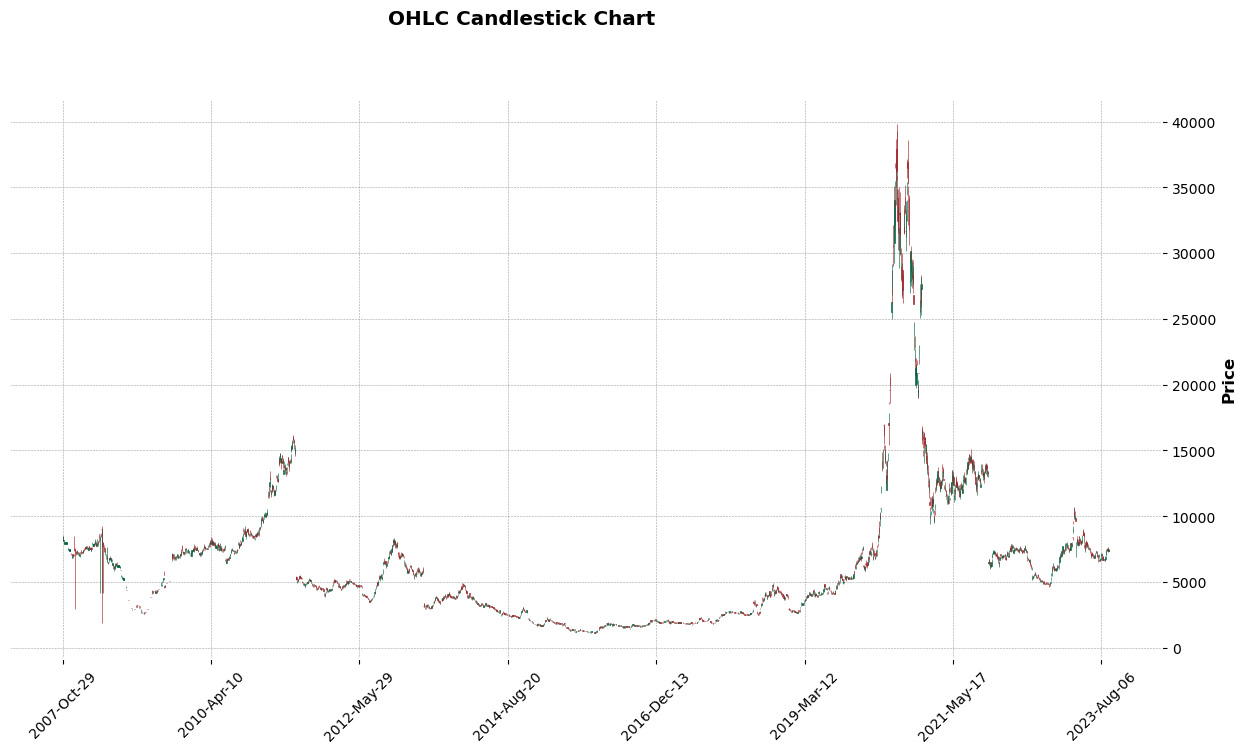

In [28]:
# Plot the candlesticks
add_plots = [
#     mpf.make_addplot(df['Close'].to_numpy(), color='orange', width=2)
]
mpf.plot(
    df, type='candle', style='charles', title='OHLC Candlestick Chart',
    warn_too_much_data=10000, figsize=(16, 8), addplot=add_plots
)

# Get the number of rows

In [29]:
df.shape

(3528, 14)

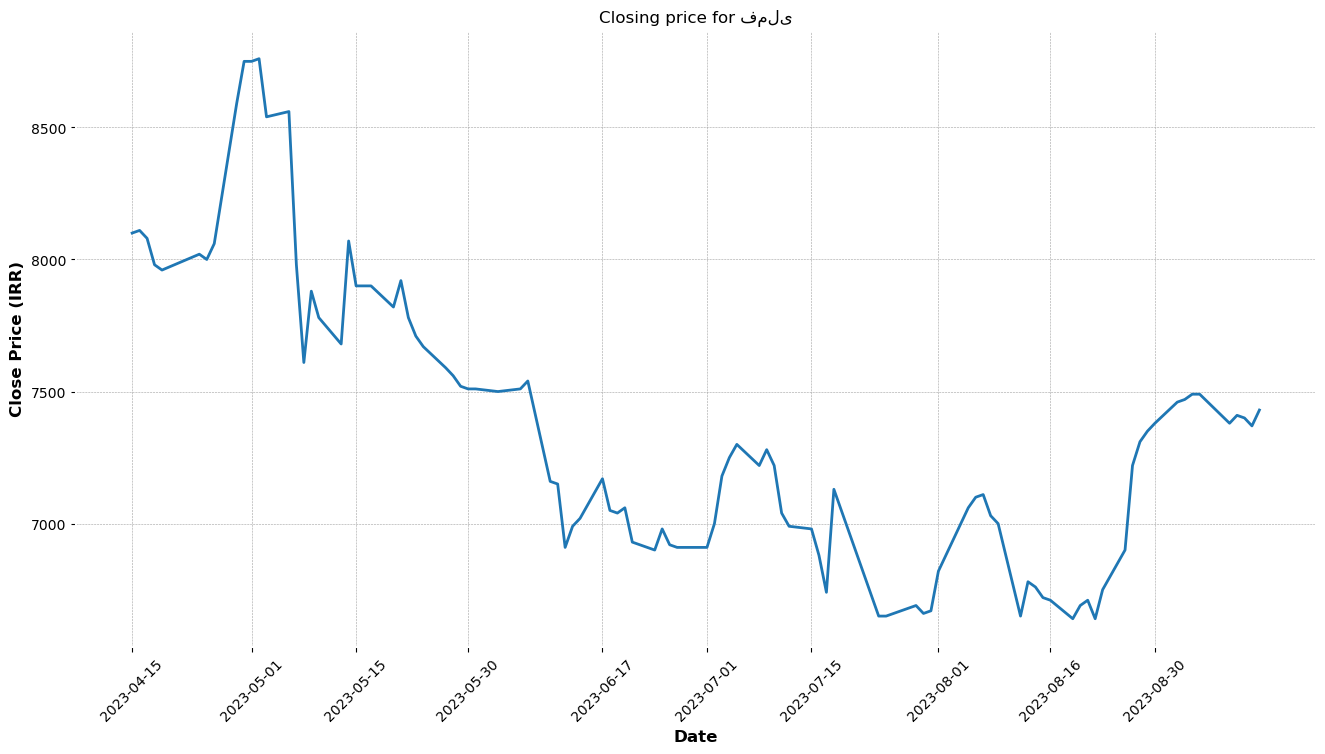

In [30]:
# Closing Price Chart
df_last_100 = df[-100:]
plt.figure(figsize=(16, 8))
plt.title(f"Closing price for {ticker}")
plt.plot(df_last_100['Close'])
plt.xticks(df_last_100.index[::10], rotation=45)
plt.xlabel("Date")
plt.ylabel("Close Price (IRR)")
plt.show()

In [31]:
# Create new df with only colse price
training_columns = ["Close", "Rsi", "Ema20", "Ema100", "Ema150"]
data = df.filter(training_columns)

# Conver to numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
data.shape

(3528, 5)

## Feature Scaling with MinMaxScaler

In [32]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.19777963, 0.51141979, 0.23226878, 0.22699915, 0.20756373],
       [0.20027755, 0.5367832 , 0.23138659, 0.22796794, 0.20896171],
       [0.19819595, 0.51625909, 0.23036651, 0.22885926, 0.21029618],
       ...,
       [0.1737441 , 0.63883851, 0.18732667, 0.23168603, 0.26304319],
       [0.17291146, 0.62578304, 0.18780734, 0.2317957 , 0.26311488],
       [0.17457674, 0.64457895, 0.18841976, 0.23194984, 0.26322161]])

## Create The Training Dataset

In [33]:
# Set Backtrack Candles
BACKTRACK = 42
# Create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train
x_train = []
y_train = []

for i in range(BACKTRACK, len(train_data)):
    x_train.append(train_data[i-BACKTRACK:i, :])
    y_train.append(train_data[i, 0])

# Conver x_train and y_tarin to numpy
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshape the data (659, 60) to (659, 60, 1)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], len(training_columns)))
y_train = np.reshape(y_train, (y_train.shape[0], 1))
print("x_train shspe: ", x_train.shape)
print("y_train shape: ", y_train.shape)

x_train shspe:  (2781, 42, 5)
y_train shape:  (2781, 1)


## Create The Testing Dataset

In [34]:
# Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len-BACKTRACK:, :]
# Creaet the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, 0]
for i in range(BACKTRACK, len(test_data)):
    x_test.append(test_data[i-BACKTRACK:i, :])
# Convert the data to a numpy array and reshape it
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], len(training_columns)))
y_test = np.array(y_test)
y_test = np.reshape(y_test, (y_test.shape[0], 1))
print("x_test shspe: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_test shspe:  (705, 42, 5)
y_test shape:  (705, 1)


## Build The LSTM Model 1

In [35]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], len(training_columns))))
model.add(LSTM(50, return_sequences=False, ))
model.add(Dense(25))
model.add(Dense(1)) 

### Compile The Model

In [36]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 42, 50)            11200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 32701 (127.74 KB)
Trainable params: 32701 (127.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Train The Model

In [37]:
model.fit(x_train, y_train, batch_size=8, epochs=1, verbose=1)

348/348 [==============================] - 5s 10ms/step - loss: 0.0017


### Predicted Price & RMSE

In [38]:
# Get the model predicted price values
predictions = model.predict(x_test)

mod_predictions = np.zeros((predictions.shape[0], len(training_columns)))
mod_predictions[:, 0] = predictions[:, 0]

predictions = scaler.inverse_transform(mod_predictions)

# Get root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions[:, 0] - y_test )**2 )
np.ceil(rmse)

23/23 [==============================] - 0s 3ms/step


348.0

In [39]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictoins'] = predictions[:, 0]

/tmp/ipykernel_105157/2526726248.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictoins'] = predictions[:, 0]


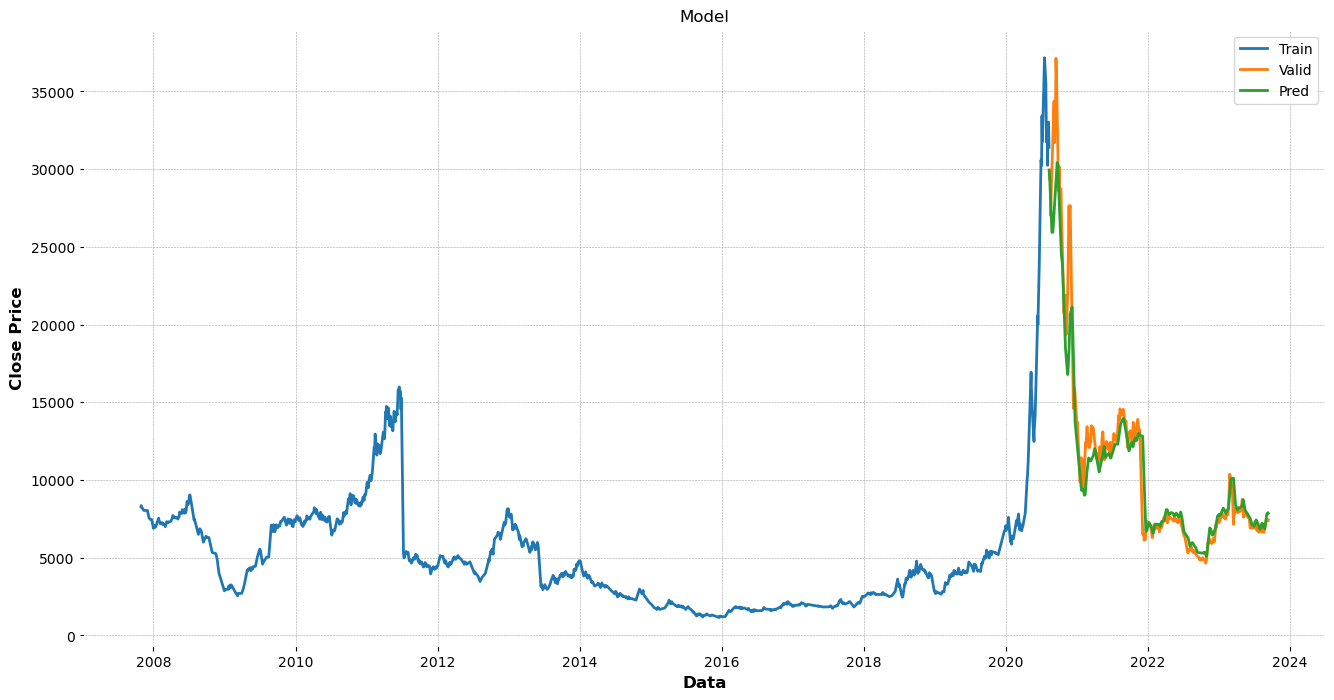

In [40]:
# Visulalize
plt.figure(figsize=(16, 8))
plt.title("Model")
plt.xlabel("Data")
plt.ylabel("Close Price")
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictoins']])
plt.legend(['Train', 'Valid', 'Pred'])
plt.show()

# Prediction

In [1]:
# Get the qoute
ticker_qoute = df
# Create a new DataFrame
new_df = ticker_qoute.filter(training_columns)
# Get the last backtrack days closing price values and convert the dataframe to numpy array
backtracks = new_df[-BACKTRACK:].values
# Scale the data to be values in (0, 1)
backtracks_scaled = scaler.transform(backtracks)
# Create an empty list
X_test = []
# Append the past backtrack days
X_test.append(backtracks_scaled)
# Conver to numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], len(training_columns)))
# Get the predicted scaled price
pred_price = model.predict(X_test)
mod_pred_price = np.zeros((pred_price.shape[0], len(training_columns)))
mod_pred_price[:, 0] = pred_price[:, 0]
# undo the scaling
pred_price = scaler.inverse_transform(mod_pred_price)
print(pred_price[0,0])

NameError: name 'df' is not defined